In [25]:
import numpy as np
import pandas as pd
from cvxopt import matrix as matrix
from cvxopt import solvers as solvers
import matplotlib.pyplot as plt

## Data loading and manipulation

In [2]:
df_train = pd.read_csv('train.csv', header=None)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,0.0,-0.36,-0.91,-0.99,-0.57,-1.38,-1.54,-1.64,1.29,0.65,...,1.15,-0.05,-0.09,0.02,1.75,1.58,0.12,0.30,2.44,-1.26
1,1.0,-1.40,-1.90,0.09,0.29,-0.30,-1.30,1.13,-2.38,-1.16,...,0.48,0.24,-0.16,-0.48,-0.02,-0.35,-0.27,-0.20,-0.92,-0.46
2,1.0,-0.43,1.45,-0.68,-1.58,0.32,-0.14,0.23,-1.01,-0.39,...,-0.94,0.11,-1.30,-0.24,0.74,0.88,1.37,0.12,0.01,-0.56
3,1.0,-0.76,0.30,-0.57,-0.33,-1.50,1.84,1.37,0.23,0.66,...,-0.42,0.06,-1.05,0.35,-0.24,-0.69,1.31,-0.18,-1.54,-1.70
4,0.0,-0.76,1.36,0.00,-1.44,-1.27,-0.76,-1.42,-0.58,0.11,...,-0.44,1.45,-1.18,-1.13,-0.14,0.04,0.33,1.20,-0.81,-1.16


In [3]:
#change name for 'label' column and examine dataframe
df_train=df_train.rename(columns={0: "target"})
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Columns: 201 entries, target to 200
dtypes: float64(201)
memory usage: 13.0 MB


There are 201 columns including 'target', 8500 instances in train set with no missing entries

In [4]:
#change '0.0' labels in target column to '-1.0'
df_train['target'] = df_train['target'].replace(0,-1.0)

In [5]:
#create X_train array
X_train = df_train.iloc[:,1:].values
X_train.shape

(8500, 200)

In [6]:
#create y_train array
y_train = df_train['target'].values.reshape(-1,1)
y_train.shape

(8500, 1)

In [7]:
df_test = pd.read_csv('test.csv', header=None)
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,1.0,-0.97,-0.69,-0.96,1.05,0.02,0.64,-0.91,-1.33,-1.21,...,-1.27,0.89,1.32,2.98,1.68,0.29,-1.88,-0.60,-0.68,0.20
1,0.0,-0.82,-0.17,-0.36,-1.99,-1.54,-0.31,-1.75,0.14,-0.54,...,1.14,2.49,1.94,-0.94,-0.70,1.10,-1.44,0.46,0.98,2.90
2,0.0,-1.68,0.13,-0.42,1.41,0.89,-0.42,1.33,-0.08,-0.14,...,-0.99,-0.45,0.21,0.37,1.16,-0.56,-0.57,-1.42,-0.38,0.33
3,0.0,-1.28,1.21,0.65,1.90,-1.21,-0.38,-0.79,2.18,-0.99,...,-0.83,0.26,-0.22,-0.57,-0.34,-1.35,-0.79,-0.62,-0.54,0.51
4,1.0,-1.18,0.41,1.05,0.16,-0.72,0.91,0.33,-0.23,0.77,...,-0.84,-0.70,-0.88,-1.53,0.81,1.14,1.21,-0.15,0.26,1.09


In [8]:
#change name for 'label' column and examine dataframe
df_test=df_test.rename(columns={0: "target"})
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Columns: 201 entries, target to 200
dtypes: float64(201)
memory usage: 2.3 MB


There are 201 columns including 'target', 8500 instances in test set with no missing entries

In [9]:
#change '0.0' labels in target column to '-1.0'
df_test['target'] = df_test['target'].replace(0,-1.0)


In [10]:
#create X_test array 
X_test = df_test.iloc[:,1:].values
X_test.shape

(1500, 200)

In [11]:
#create y_test array
y_test = df_test['target'].values.reshape(-1,1)
y_test.shape

(1500, 1)

## Implementation of sklearn SVM 
In this section we will implement sklearn SVM with linear kernel for classification. The regularisation parameter 'C' will be optimized using k-fold cross validation on train set. The model with optimum C will then be fit on entire train set. We will examine the support vectors, weights and bias parameters of model implemented by sklearn (to compare parameters of primal and dual forms implemented using cvxopt). The model will also be evaluated on test set and the accuracy score will be compared with that obtained with cvxopt implementation of primal and dual forms of linear SVM.

In [12]:
# from sklearn.svm import SVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

svc = SVC(kernel='linear')

params = [{'C': [1e-4,1e-3,1e-2,1,10]}]
clf = GridSearchCV(svc, params,cv=5, scoring = 'accuracy')
clf.fit(X_train,y_train.ravel())



GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid=[{'C': [0.0001, 0.001, 0.01, 1, 10]}],
             scoring='accuracy')

In [13]:
print('Optimal "C" based on 5-fold cross validation on train set:{}'.format(clf.best_params_) )
print('Mean accuracy score with 5-fold cross validation on train set: {:.1f}%'.format(clf.best_score_*100))

Optimal "C" based on 5-fold cross validation on train set:{'C': 0.001}
Mean accuracy score with 5-fold cross validation on train set: 97.3%


In [14]:
#fit model with optimal C on entire train set and evaluate on test set
model = SVC(kernel='linear', C=0.001)
model.fit(X_train,y_train.ravel())
train_pred_sklearn = model.predict(X_train)
train_accuracy_sklearn = accuracy_score(train_pred_sklearn,y_train)
test_pred_sklearn = model.predict(X_test)
test_accuracy_sklearn = accuracy_score(test_pred_sklearn,y_test)
print('Train accuracy obtained with sklearn implementation: {:.1f}%'.format(train_accuracy_sklearn*100))
print()
print('Test accuracy obtained with sklearn implementation: {:.1f}%'.format(test_accuracy_sklearn*100))

Train accuracy obtained with sklearn implementation: 97.6%

Test accuracy obtained with sklearn implementation: 97.4%


In [15]:
sklearn_support_indices = model.support_
sklearn_weights = model.coef_
sklearn_bias = model.intercept_
print('Number of support vectors with sklearn implementation: {}'.format(len(sklearn_support_indices)))

Number of support vectors with sklearn implementation: 1310


## Implementation of SVM primal form
in this section we implement primal form of soft margin linear SVM using CVXOPT package.We will use the optimized C value obtained with 5-fold cross validation. The primal objective function that we will optimize is shown in Fig.1a.
The CVXOPT Quadratic program framework requires optimization functions to be of the form as shown in Fig.1b and all alternate formulations must be manipulated to conform to it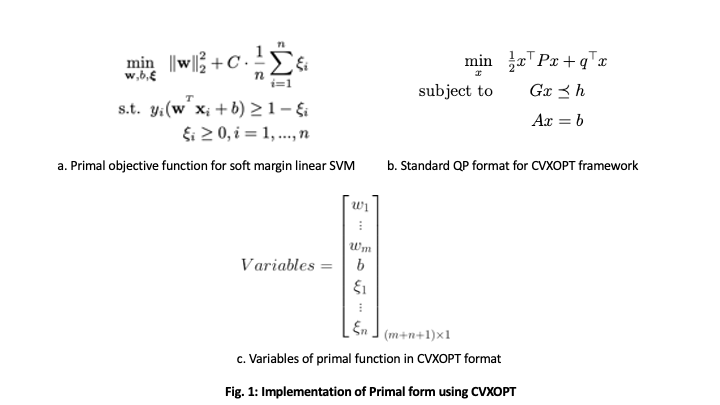
Our variables vector is as shown in Fig.1c, where $m$ is number of features and $n$ is number of training instances. We need to define parameters P,q,G,h. Note, we do not need parameters A,b as there is no equality constraint in our objective function.

In [16]:
def svm_primal_model(data_train,label_train,regularisation_para_C):
    
    n = data_train.shape[0]  #no. of training instances
    m = data_train.shape[1]  #no. of features
    C = regularisation_para_C
    
    #create numpy arrays for cvxopt parameters
    P_up = np.concatenate((np.eye(m),np.zeros(shape=(m,n+1))), axis=1)
    q1 = np.zeros(shape=(m+1,1))
    q2 = np.full((n,1),C/n)
    G_up = np.concatenate((-1*label_train*data_train,-1*label_train,-np.eye(n)),axis=1)
    G_down = np.concatenate((np.zeros(shape=(n,m+1)), -np.eye(n)),axis=1)
    h1 = -np.ones(shape=(n,1))
    h2 = np.zeros(shape=(n,1))
    
    #create cvxopt matrices
    P = matrix(np.concatenate((P_up,np.zeros(shape=(n+1,m+n+1))), axis=0))
    q = matrix(np.concatenate((q1,q2), axis = 0))
    G = matrix(np.concatenate((G_up, G_down), axis=0))
    h = matrix(np.concatenate((h1,h2), axis=0))
    
    #optimize
    sol = solvers.qp(P,q,G,h)
    
    #get parameters
    parameters = np.array(sol['x'])
    weights = parameters[0:200]
    bias = parameters[200]
    
    
    return weights,bias
    

In [17]:
def svm_predict_primal(data_test,label_test,svm_model):
    
    #get parameters from model output
    
    weights = svm_model[0]
    bias = svm_model[1]
    
    #compute predictions
    y_pred = np.dot(data_test,weights) + bias
    y_pred_class = [1.0 if x>=0 else -1.0 for x in y_pred]
    y_pred_class = np.asarray(y_pred_class).reshape(label_test.shape[0],1)
    
    #calculate accuracy
    score = accuracy_score(y_pred_class, label_test)
    
    return score
    

Note: To match sklearn implementation for SVM classifier, we need to refactor the $C$ value by multiplying it with $n$, as the formula for sklearn minimization problem does not account for $1/n$

In [18]:
#solve primal form with C=0.001*n
primal = svm_primal_model(X_train,y_train,8.5)

     pcost       dcost       gap    pres   dres
 0:  8.7201e-01  8.5242e+02  9e+04  3e+00  6e+04
 1:  1.9796e+01 -8.8604e+02  9e+02  3e-02  6e+02
 2:  1.8726e+01 -4.4388e+01  6e+01  2e-03  3e+01
 3:  9.6514e+00 -3.3805e+00  1e+01  2e-04  4e+00
 4:  2.1723e+00  3.7231e-01  2e+00  2e-05  4e-01
 5:  1.3838e+00  7.5036e-01  6e-01  7e-06  1e-01
 6:  1.2346e+00  8.3212e-01  4e-01  4e-06  7e-02
 7:  1.1193e+00  8.9452e-01  2e-01  2e-06  4e-02
 8:  1.0572e+00  9.2887e-01  1e-01  1e-06  2e-02
 9:  1.0118e+00  9.5404e-01  6e-02  3e-07  6e-03
10:  9.9168e-01  9.6646e-01  3e-02  1e-07  2e-03
11:  9.8118e-01  9.7347e-01  8e-03  1e-08  2e-04
12:  9.7762e-01  9.7634e-01  1e-03  5e-10  8e-06
13:  9.7700e-01  9.7692e-01  8e-05  3e-11  5e-07
14:  9.7696e-01  9.7696e-01  3e-06  8e-13  1e-08
15:  9.7696e-01  9.7696e-01  4e-08  1e-14  2e-10
Optimal solution found.


In [19]:
#compute predictions using parameters obtained by solving primal form
train_score_p = svm_predict_primal(X_train,y_train,primal)
test_score_p = svm_predict_primal(X_test,y_test,primal)
print('Train accuracy obtained with solving primal form: {:.1f}%'.format(train_score_p*100))
print()
print('Test accuracy obtained with solving primal form: {:.1f}%'.format(test_score_p*100))


Train accuracy obtained with solving primal form: 97.6%

Test accuracy obtained with solving primal form: 97.4%


The accuracy for train and test sets obtained with optimization of primal form using CVXOPT package matches exactly with the sklearn implementation. 

## Implementation of SVM Dual form
In this section, we solve the dual form using CVXOPT package.
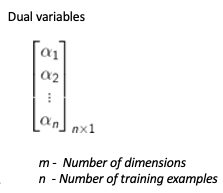


In [20]:
def svm_dual_model(data_train,label_train,regularisation_para_C):
    n = data_train.shape[0]  #no. of training instances
    m = data_train.shape[1]  #no. of features
    C = regularisation_para_C
    
    #create numpy arrays for cvxopt parameters
    P = np.dot(label_train,label_train.T)*np.matmul(data_train,data_train.T)
    q = -np.ones(shape=(n,1))
    G1 = -np.eye(n)
    G2 = np.eye(n)
    h1 = np.zeros(shape=(n,1))
    h2 = np.full((n,1),C/n)
    A = label_train.T
    b = np.zeros(shape=(1,1))
    
    #create cvxopt matrices
    P = matrix(P)
    q = matrix(q)
    G = matrix(np.concatenate((G1,G2),axis=0))
    h = matrix(np.concatenate((h1,h2),axis=0))
    A = matrix(A)
    b = matrix(b)
    
    #optimize
    sol = solvers.qp(P,q,G,h,A,b)
    
    #reconstruct weights and bias
    parameters = np.array(sol['x'])
    weights = np.sum(label_train*parameters*data_train,axis=0)
    weights = weights.reshape(1,data_train.shape[1])
    S = (parameters>1e-4).flatten()
    bias_values = label_train[S] - np.dot(data_train[S],weights.T)
    bias = np.mean(bias_values)
    
    
    return weights,bias
    
    

In [21]:
dual = svm_dual_model(X_train,y_train,8.5)

     pcost       dcost       gap    pres   dres
 0: -8.3329e+02 -2.0012e+01  9e+04  3e+02  1e-12
 1: -9.9736e+00 -1.9998e+01  9e+02  3e+00  1e-12
 2: -1.6760e+00 -1.8736e+01  6e+01  2e-01  6e-14
 3: -9.6508e-01 -9.6527e+00  1e+01  2e-02  8e-15
 4: -6.7128e-01 -2.1724e+00  2e+00  2e-03  4e-15
 5: -8.1872e-01 -1.3838e+00  6e-01  7e-04  3e-15
 6: -8.6592e-01 -1.2346e+00  4e-01  4e-04  3e-15
 7: -9.1010e-01 -1.1193e+00  2e-01  2e-04  3e-15
 8: -9.3628e-01 -1.0572e+00  1e-01  9e-05  3e-15
 9: -9.5634e-01 -1.0118e+00  6e-02  3e-05  3e-15
10: -9.6719e-01 -9.9168e-01  3e-02  1e-05  3e-15
11: -9.7356e-01 -9.8118e-01  8e-03  1e-06  3e-15
12: -9.7635e-01 -9.7762e-01  1e-03  4e-08  3e-15
13: -9.7692e-01 -9.7700e-01  8e-05  2e-09  3e-15
14: -9.7696e-01 -9.7696e-01  3e-06  8e-11  3e-15
15: -9.7696e-01 -9.7696e-01  4e-08  1e-12  4e-15
Optimal solution found.


In [22]:
def svm_predict_dual(data_test,label_test,svm_model_d):
    
    #get parameters from model output
    weights = svm_model_d[0]
    bias = svm_model_d[1]
     
    #compute predictions
    y_pred = np.dot(data_test,weights.T)+bias
    y_pred_class = [1.0 if x>=0 else -1.0 for x in y_pred]
    y_pred_class = np.asarray(y_pred_class).reshape(label_test.shape[0],1)
    
    #calculate accuracy
    score = accuracy_score(y_pred_class, label_test)
    
    return score
    
    


In [23]:
#compute predictions using parameters obtained by solving dual form
train_score_d = svm_predict_dual(X_train,y_train,dual)
test_score_d = svm_predict_dual(X_test,y_test,dual)
print('Train accuracy obtained by solving dual form: {:.1f}%'.format(train_score_d*100))
print()
print('Test accuracy obtained by solving dual form: {:.1f}%'.format(test_score_d*100))



Train accuracy obtained by solving dual form: 97.7%

Test accuracy obtained by solving dual form: 97.4%


The accuracies for train and test sets obtained with optimization of dual form using CVXOPT package matches exactly with the sklearn implementation and primal form. 

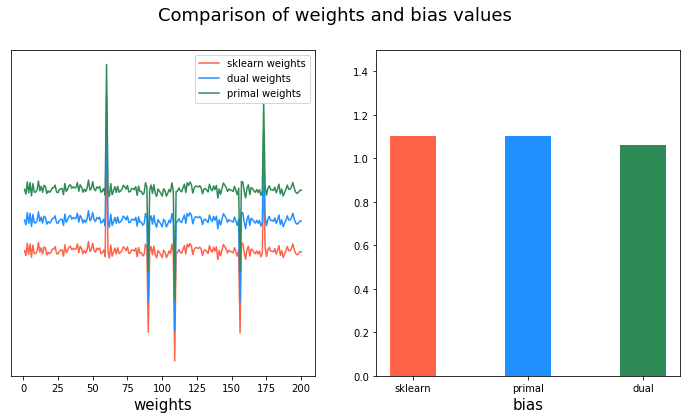

In [26]:
fig,ax = plt.subplots(1,2, figsize=(12,6))
fig.suptitle('Comparison of weights and bias values', fontsize=18)
ax[0].plot(np.arange(1,201), sklearn_weights.flatten(), color='tomato',label='sklearn weights')
ax[0].plot(np.arange(1,201), dual[0].flatten()+0.1, color = 'dodgerblue',label='dual weights')
ax[0].plot(np.arange(1,201), np.array(primal[0]).flatten()+0.2,color='seagreen', label = 'primal weights')
ax[0].set_yticks([])
ax[0].set_xlabel('weights',fontsize='15')

ax[0].legend()
ax[1].bar(['sklearn','primal','dual'],[sklearn_bias[0],np.array(primal[1]),dual[1]], width=0.4, color = ['tomato','dodgerblue','seagreen'])
ax[1].set_ylim([0,1.5])
ax[1].set_xlabel('bias',fontsize='15');
